In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import re
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [203]:
data = pd.read_csv('nyc_real_estate.csv', index_col=False)

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       387 non-null    int64 
 1   Name             387 non-null    object
 2   City             387 non-null    object
 3   Neighbourhood    387 non-null    object
 4   Price            387 non-null    object
 5   Year Built       387 non-null    object
 6   Beds             387 non-null    object
 7   Baths            387 non-null    object
 8   Area             387 non-null    object
 9   Price(per sqft)  387 non-null    object
 10  A/C              387 non-null    object
dtypes: int64(1), object(10)
memory usage: 33.4+ KB


In [205]:
data.rename(columns = {"Area" : "Area (sqft)"}, inplace = True)
data = data.drop(labels = ['Unnamed: 0'], axis = 1)
data = data.replace("Null", pd.NA).dropna()
data['Price'] = data['Price'].str.replace('$', '')
data['Baths_cleaned'] = data['Baths'].str.replace('Baths', '')
data['Baths_cleaned'] = data['Baths_cleaned'].str.replace('Bath', '')
data['Baths_cleaned'] = data['Baths_cleaned'].apply(lambda x: int(x))
data['Year Built'] = data['Year Built'].apply(lambda x : x[-4:])
data['Area (sqft)']= data['Area (sqft)'].apply(lambda x: x.strip('sqft'))
data['Area (sqft)']= data['Area (sqft)'].str.replace(',', '')
data['Beds'] = data['Beds'].apply(lambda x : x[0])
data['Beds'] = data['Beds'].replace('S', 0.5)
data['Price'] = data['Price'].str.replace(',', '').astype(int)
data['Beds'] = data['Beds'].apply(lambda x: int(x))
data['Year Built'] = data['Year Built'].apply(lambda x : x[-4:])
data['Beds'] = data['Beds'].replace('S', 0.5)
#data['Price'] = data['Price'].apply(lambda x: int(re.search(r'\d+', x).group()))
data['Beds'] = data['Beds'].apply(lambda x : int(x))
data['Price(per sqft)'] = data['Price(per sqft)'].str.replace('$', '')
data['Price(per sqft)'] = data['Price(per sqft)'].str.replace(',', '').astype(int)
data['Area (sqft)'] = data['Area (sqft)'].apply(lambda x : x.strip('sqft'))
data['Area (sqft)'] = data['Area (sqft)'].str.replace(',', '')
data['Area (sqft)'] = data['Area (sqft)'].apply(lambda x : int(re.search(r'\d+', x).group()))

/var/folders/bm/7gfzqmk92w7f0g15qhnh3_1h0000gn/T/ipykernel_25365/2603396742.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$', '')
/var/folders/bm/7gfzqmk92w7f0g15qhnh3_1h0000gn/T/ipykernel_25365/2603396742.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price(per sqft)'] = data['Price(per sqft)'].str.replace('$', '')


In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 1 to 385
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             251 non-null    object
 1   City             251 non-null    object
 2   Neighbourhood    251 non-null    object
 3   Price            251 non-null    int64 
 4   Year Built       251 non-null    object
 5   Beds             251 non-null    int64 
 6   Baths            251 non-null    object
 7   Area (sqft)      251 non-null    int64 
 8   Price(per sqft)  251 non-null    int64 
 9   A/C              251 non-null    object
 10  Baths_cleaned    251 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 23.5+ KB


## What is the distribution of property types & pricing in New York?

Outlier detection paired with descriptive statistics (mean, mode, SD, etc.)

Histogram - traditional distribution plot to serve as a basis for understanding the broad scope of the NY Real Estate market

### SVM classification

In [207]:
target = "Baths"

X = data.drop(columns=[target,'Name','City','Neighbourhood','Price(per sqft)','A/C'])
y = data[target]

#X is just the measurements and y are just the labels

seed = 100
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [208]:
model = svm.SVC(gamma="scale",kernel="rbf")
#instantiation of the moderl and pass in hyper-parameters
model.fit(X_train, y_train)

SVC()

### SVC()

In [209]:
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#score model to get accuracy

Accuracy: 57.83%


In [210]:
y_pred

array(['6 Baths', '1 Bath', '2 Baths', '1 Bath', '1 Bath', '2 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '2 Baths', '2 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '6 Baths', '1 Bath', '1 Bath', '6 Baths', '2 Baths',
       '2 Baths', '1 Bath', '1 Bath', '4 Baths', '1 Bath', '1 Bath',
       '1 Bath', '6 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '4 Baths', '2 Baths',
       '4 Baths', '1 Bath', '1 Bath', '1 Bath', '2 Baths', '1 Bath',
       '2 Baths', '1 Bath', '2 Baths', '1 Bath', '1 Bath', '2 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '6 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '2 Baths', '2 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '2 Baths', '1 Bath', '1 Bath', '2 Baths'], dtype=object)

In [211]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5783132530120482
[[31  0  0  0  0  0]
 [26  9  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 3  0  0  3  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  5]]
              precision    recall  f1-score   support

      1 Bath       0.52      1.00      0.68        31
     2 Baths       0.60      0.26      0.36        35
     3 Baths       0.00      0.00      0.00         4
     4 Baths       1.00      0.50      0.67         6
     5 Baths       0.00      0.00      0.00         2
     6 Baths       1.00      1.00      1.00         5

    accuracy                           0.58        83
   macro avg       0.52      0.46      0.45        83
weighted avg       0.58      0.58      0.51        83



/Users/caseysestanovich/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/caseysestanovich/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/caseysestanovich/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### Naive Bayes Classification

In [212]:
model = GaussianNB()
#instantiate the model
model.fit(X_train, y_train)
#fit to the training data set (never fit to test dataset)
y_pred = model.predict(X_test)
# make predictions for test data
predictions = y_pred
#gives us a series of predictions and set to a new variable 
predictions

array(['6 Baths', '1 Bath', '2 Baths', '1 Bath', '1 Bath', '2 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '2 Baths', '5 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '6 Baths', '1 Bath', '1 Bath', '6 Baths', '2 Baths',
       '2 Baths', '1 Bath', '1 Bath', '4 Baths', '1 Bath', '1 Bath',
       '1 Bath', '6 Baths', '1 Bath', '1 Bath', '4 Baths', '4 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '4 Baths', '3 Baths',
       '4 Baths', '1 Bath', '1 Bath', '1 Bath', '2 Baths', '1 Bath',
       '2 Baths', '1 Bath', '3 Baths', '1 Bath', '1 Bath', '3 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '4 Baths', '1 Bath', '1 Bath', '1 Bath',
       '6 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '2 Baths', '2 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '3 Baths', '1 Bath', '1 Bath', '5 Baths'], dtype='<U7')

In [213]:
matches = pd.concat([pd.DataFrame(y_test.values).reset_index(),pd.DataFrame(predictions).reset_index()], axis=1)
#concatinate the test values put them next to our actual values. Row 17 is the first falsley predicted label
#Actual is veriscilor predicted is virginica (modle doenst get everything correct)

matches

,index,0,index,0
0,0,6 Baths,0,6 Baths
1,1,2 Baths,1,1 Bath
2,2,2 Baths,2,2 Baths
3,3,1 Bath,3,1 Bath
4,4,1 Bath,4,1 Bath
...,...,...,...,...
78,78,1 Bath,78,1 Bath
79,79,3 Baths,79,3 Baths
80,80,2 Baths,80,1 Bath
81,81,2 Baths,81,1 Bath


In [214]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
#actual number of posistives + true negatives / allsamples
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#confusion_matrix tells us where the model went wrong
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 68.67%
[[31  0  0  0  0  0]
 [26  9  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  5]]
              precision    recall  f1-score   support

      1 Bath       0.54      1.00      0.70        31
     2 Baths       1.00      0.26      0.41        35
     3 Baths       1.00      1.00      1.00         4
     4 Baths       1.00      1.00      1.00         6
     5 Baths       1.00      1.00      1.00         2
     6 Baths       1.00      1.00      1.00         5

    accuracy                           0.69        83
   macro avg       0.92      0.88      0.85        83
weighted avg       0.83      0.69      0.64        83



/Users/caseysestanovich/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


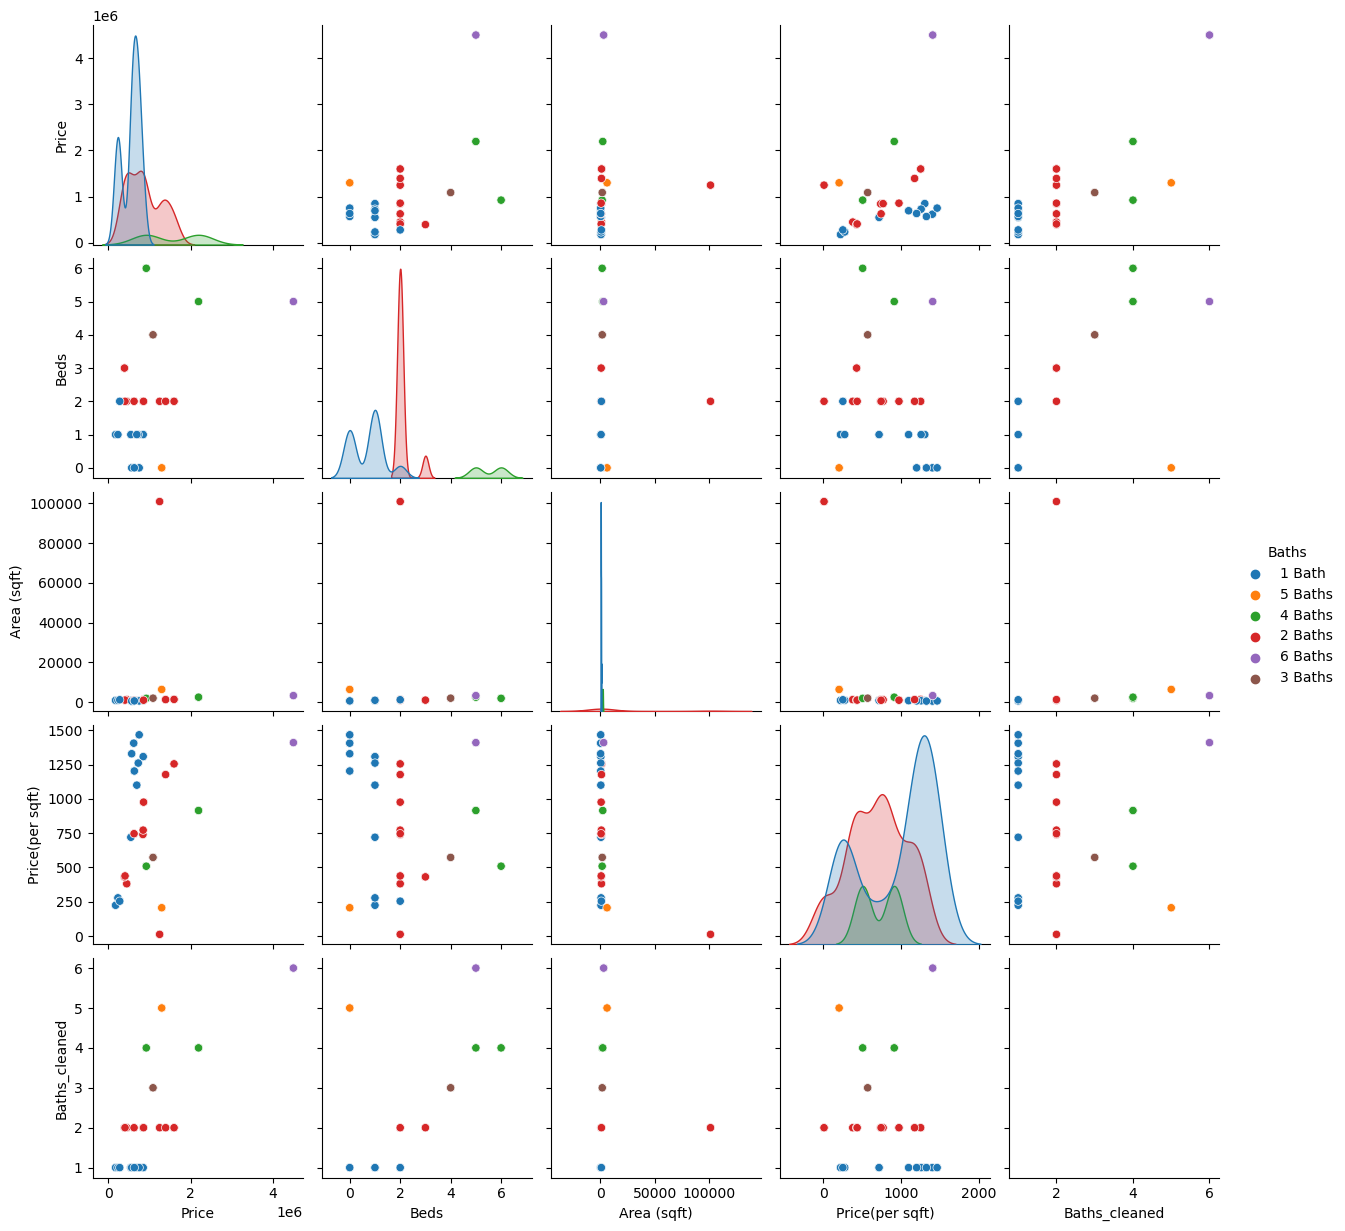

In [215]:
sns.pairplot(data,hue='Baths', size=2.5)

### Decision Tree Classifier

In [216]:
model = DecisionTreeClassifier(
    random_state=3, 
    criterion='entropy',
    splitter='best', 
    max_depth=3, 
    )

#decison trees are the same game as 20 questions on a dataset
#entropy is a measure of the predictablity in each class 
#max_depth 


model.fit(X_train,y_train)
#fit
y_pred = model.predict(X_test)
#predict
accuracy = model.score(X_test, y_test)
# evaluate predictions

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.16%


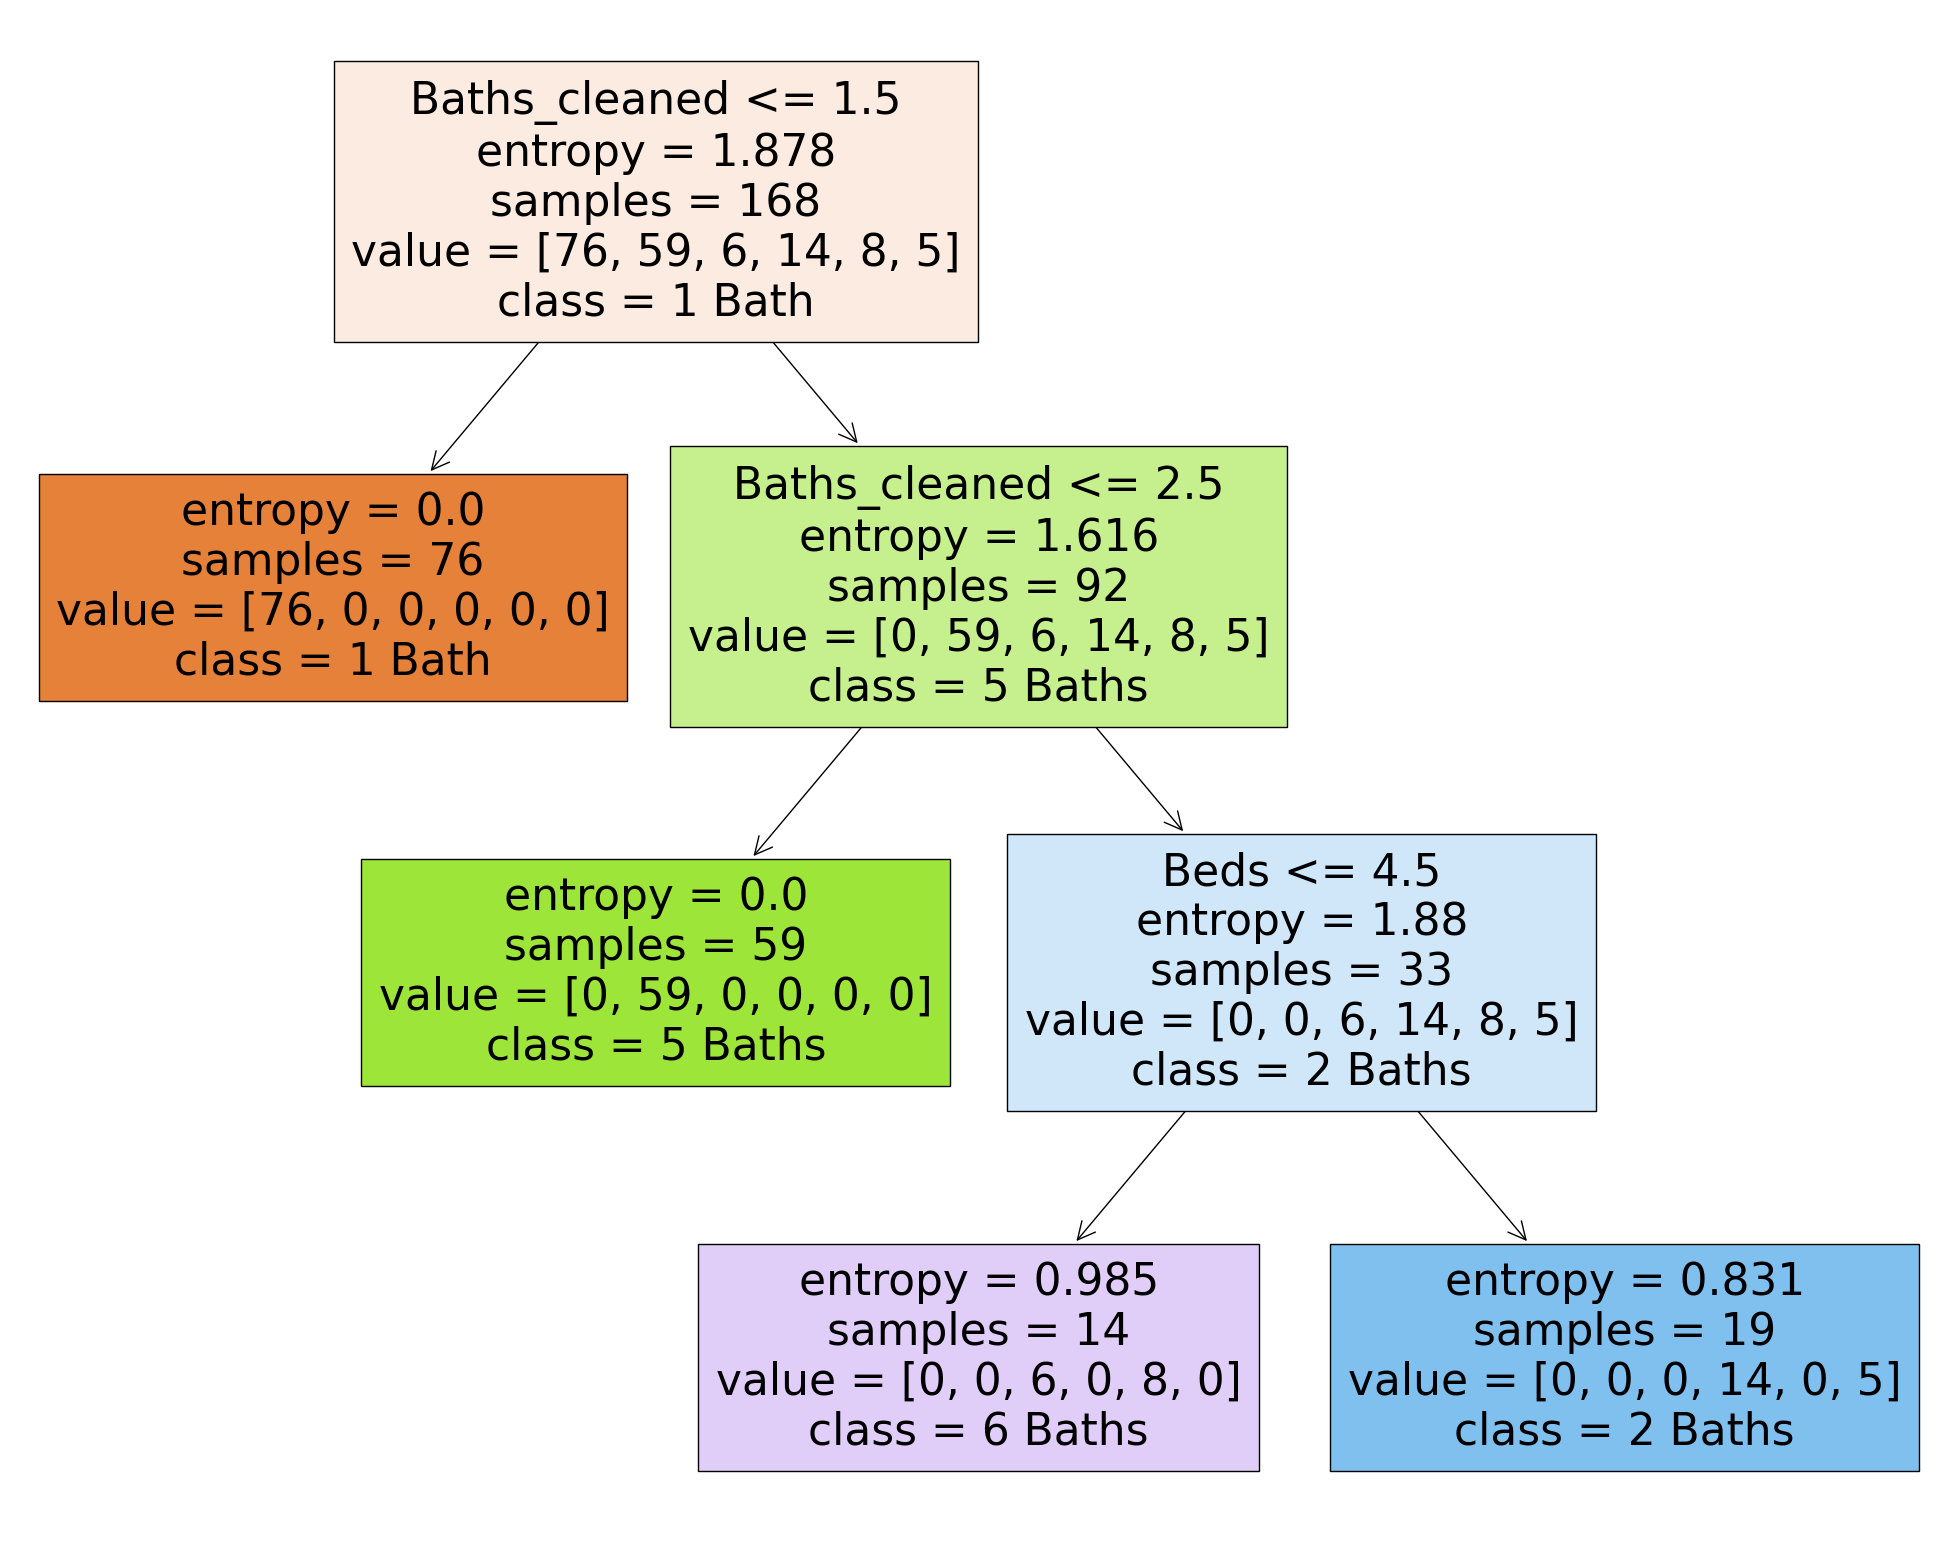

In [217]:
fig = plt.figure(figsize=(25,20))
# we use '_' to capture the return from plot_tree(...) and never do anything with it
_ = plot_tree(model, 
                feature_names=list(X.columns),  # ordered list of features
                class_names=list(y.unique()), # unique() is handy here due to numerical sorting of classes
                filled=True)

## Is there a correlation between the number of bedrooms and property price?

In [218]:
olsreg = ols('Price ~ Beds', data=data).fit()
olsreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     99.46
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           6.30e-20
Time:                        12:55:15   Log-Likelihood:                -3740.0
No. Observations:                 251   AIC:                             7484.
Df Residuals:                     249   BIC:                             7491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.29e+05   7.02e+04      6.113      0.000    2.91e+05    5.67e+05
Beds        2.828e+05   2.84e+04      9.973      0.000    2.27e+05    3.39e+05
==============================================================================
Omnibus:                      106.656   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.887
Skew:                           1.775   Prob(JB):                     5.98e-90
Kurtosis:                       8.166   Cond. No.                         4.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
r_squared = olsreg.rsquared
p_value = olsreg.f_pvalue

r_squared, p_value

(0.2854370344509515, 6.301769648197888e-20)

INTERPRETATION OF ABOVE: #OLS Regression - look for evidence of statistically significant correlation between bedrooms and property price

Text(463.154761904762, 0.5, 'Price ($)')

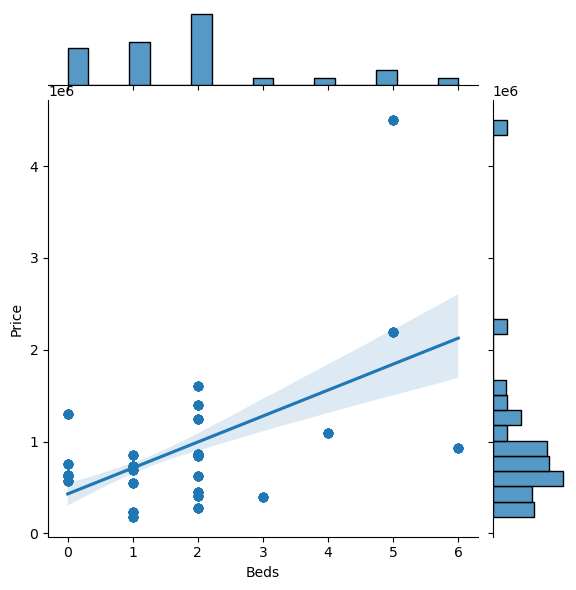

In [220]:
jg = sns.JointGrid(x="Beds", y="Price", data=data)
jg.plot(sns.regplot, sns.histplot)
plt.xlabel("Number of Beds")
plt.ylabel("Price ($)")

In [221]:
infl = olsreg.get_influence()
sm_fr = infl.summary_frame()
sm_fr
#SHOWs how many influence points are there for the above Q, according to statistically significant Cook's distances?

,dfb_Intercept,dfb_Beds,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
1,0.026136,-0.019939,0.000343,0.266923,0.009531,0.026184,0.266424,0.026136
2,0.001716,-0.000890,0.000002,0.025390,0.005212,0.001838,0.025339,0.001834
3,0.019291,-0.014717,0.000187,0.197035,0.009531,0.019329,0.196654,0.019291
4,-0.001583,0.000821,0.000001,-0.023425,0.005212,-0.001696,-0.023378,-0.001692
6,-0.044887,0.023288,0.001154,-0.663607,0.005212,-0.048033,-0.662860,-0.047979
...,...,...,...,...,...,...,...,...
379,0.028189,-0.021505,0.000399,0.287889,0.009531,0.028241,0.287358,0.028189
381,-0.204404,0.474961,0.135198,3.732022,0.019044,0.519996,3.833272,0.534104
382,0.020917,0.002457,0.000626,0.558166,0.004003,0.035388,0.557393,0.035338
384,-0.037382,-0.004391,0.001994,-0.996139,0.004003,-0.063155,-0.996123,-0.063154



INTERPRETATIONS: Regression Plot - visualize our regression results with a scatterplot and a line of best fit to graphically display correlation


## How does property price (price/sqft) vary across different neighborhoods in New York?

In [222]:
def labelled_scatterplot(data=None,x=None,y=None,labs=None):
    p1 = sns.scatterplot(data=data,x=x,y=y)
    for line in range(0,data.shape[0]):
        p1.text(data[x][line]+0.01, data[y][line], 
                data[labs][line], horizontalalignment='left', 
                size='medium', color='black')
        

In [223]:
output = data[3:7].corr()#.unstack().sort_values(ascending=False).reset_index()
output = output.unstack().sort_values(key=abs, ascending=False).drop_duplicates().reset_index()
output.columns = ['var1', 'var2', 'correlation']
mask = output.apply(lambda x: x.var1 != x.var2, axis=1)
output = output[mask]
output[:5]

/var/folders/bm/7gfzqmk92w7f0g15qhnh3_1h0000gn/T/ipykernel_25365/2505699685.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  output = data[3:7].corr()#.unstack().sort_values(ascending=False).reset_index()


,var1,var2,correlation
1,Baths_cleaned,Price,0.890791
2,Area (sqft),Baths_cleaned,0.844915
3,Area (sqft),Price,0.829771
4,Price(per sqft),Area (sqft),-0.579244
5,Baths_cleaned,Price(per sqft),-0.522867


In [224]:
data_pca = data[['Price', 'Year Built', 'Beds', 'Baths_cleaned', 'Area (sqft)', 'Price(per sqft)']]
houses_X = data_pca.values
houses_Y = data_pca.index
from sklearn.preprocessing import scale
scale(houses_X)

array([[-0.40496747,  1.22476924, -1.17998832, -0.78875229, -0.24760062,
         1.33442156],
       [-0.27509971,  1.22476924, -0.55514218, -0.78875229, -0.24053395,
         1.00685759],
       [-0.46399827,  1.22476924, -1.17998832, -0.78875229, -0.24821511,
         1.16047379],
       ...,
       [ 0.51000991,  0.92929766,  0.06970395, -0.03884008, -0.20950206,
         0.81709639],
       [-0.80649497,  0.21172381,  0.06970395, -0.78875229, -0.21385472,
        -1.26801774],
       [ 0.14874142,  0.02177779,  1.31939622,  0.71107214, -0.17293974,
        -0.547377  ]])

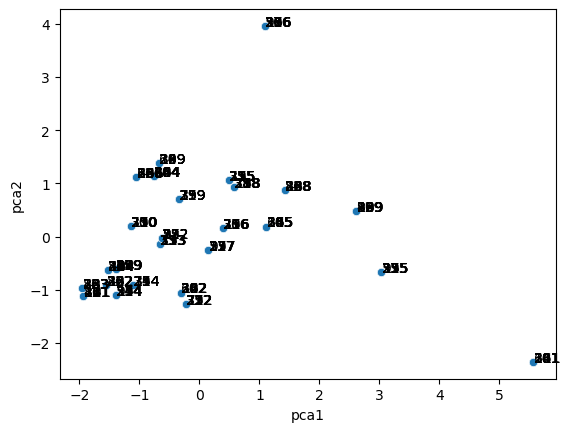

In [225]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scale(houses_X))
X_pca_labelled = pd.concat([pd.DataFrame({'who':houses_Y}),pd.DataFrame(X_pca,columns=['pca1','pca2'])],axis=1)
labelled_scatterplot(data=X_pca_labelled,x='pca1',y='pca2',labs='who')

In [226]:
pca.explained_variance_

array([2.94888652, 1.50753934])

In [227]:
np.cov(X_pca)

array([[ 0.34133892,  0.26140978,  0.40705554, ..., -0.3056848 ,
         0.78705912, -0.3808844 ],
       [ 0.26140978,  0.20019713,  0.31173796, ..., -0.23410456,
         0.60275855, -0.29169515],
       [ 0.40705554,  0.31173796,  0.48542432, ..., -0.36453708,
         0.93858848, -0.45421456],
       ...,
       [-0.3056848 , -0.23410456, -0.36453708, ...,  0.27375489,
        -0.70484788,  0.34109962],
       [ 0.78705912,  0.60275855,  0.93858848, ..., -0.70484788,
         1.81480058, -0.87824309],
       [-0.3808844 , -0.29169515, -0.45421456, ...,  0.34109962,
        -0.87824309,  0.42501139]])

In [228]:
pca.explained_variance_ratio_

array([0.48952299, 0.25025554])

/var/folders/bm/7gfzqmk92w7f0g15qhnh3_1h0000gn/T/ipykernel_25365/1301959331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")


<Axes: >

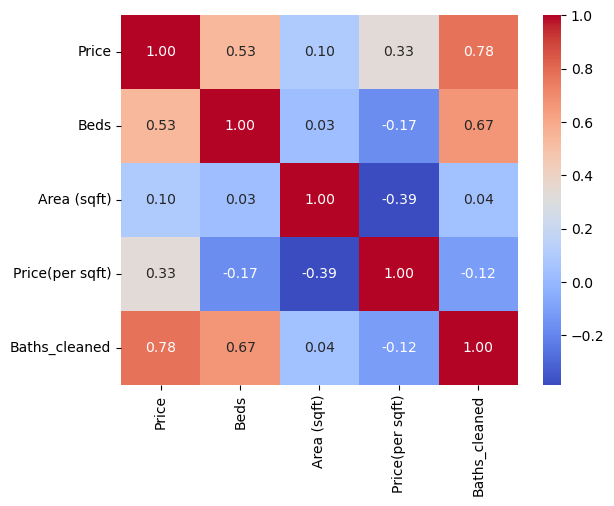

In [229]:
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [231]:
formula = 'Q("Year Built") ~ Baths_cleaned'
model = smf.ols(formula=formula, data=data).fit()
model.summary()
#fix (convert YEAR BUILT TO INT)

ValueError: endog has evaluated to an array with multiple columns that has shape (251, 18). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

## Does the presence of amenities (like air conditioning) have a statistically significant impact on property prices in New York?

In [232]:
data = data.rename(columns={'A/C': 'Air_Condition'})


In [233]:
def convert_condition(value):
    if value == 'No':
        return 0
    elif value == 'Cooling only':
        return 1
    else:
        return 2

In [234]:
data['Air_Condition'] = data['Air_Condition'].apply(convert_condition)
# convert air condition to numeric values with 0 representing no, 1 representing cooling, and 2 representing heating and cooling

In [235]:
#multiple amenities including Bed, Bath, and Air Conditioning

In [236]:
ny_lm = ols('Price ~ Air_Condition + Baths_cleaned + Beds', data=data).fit()
table = sm.stats.anova_lm(ny_lm, typ=2)
table

,sum_sq,df,F,PR(>F)
Air_Condition,2.200510e+13,1.0,110.486637,1.339053e-21
Baths_cleaned,6.220911e+13,1.0,312.349165,9.761773e-46
Beds,1.067585e+12,1.0,5.360294,2.142047e-02
Residual,4.919382e+13,247.0,NaN,NaN


In [237]:
med_am = data.groupby('Neighbourhood')[['Air_Condition', 'Baths_cleaned', 'Beds']].median()
med_am

,Air_Condition,Baths_cleaned,Beds
Neighbourhood,,,
Astoria,1.0,1.0,0.5
Battery Park,0.0,1.0,1.0
Baychester,2.0,2.0,2.0
Bedford Stuyvesant,1.0,3.0,3.5
Brooklyn Heights,0.0,6.0,5.0
Canarsie,2.0,4.0,6.0
Flushing,0.0,2.0,2.0
Gravesend,1.0,2.0,2.0
Heartland Village,2.0,2.0,2.0


ANOVA LM - analyze the amenity variables against property price while normalizing for different neighborhoods
Pair plot - Graph out each specific amenity’s impact on property pricing in NY


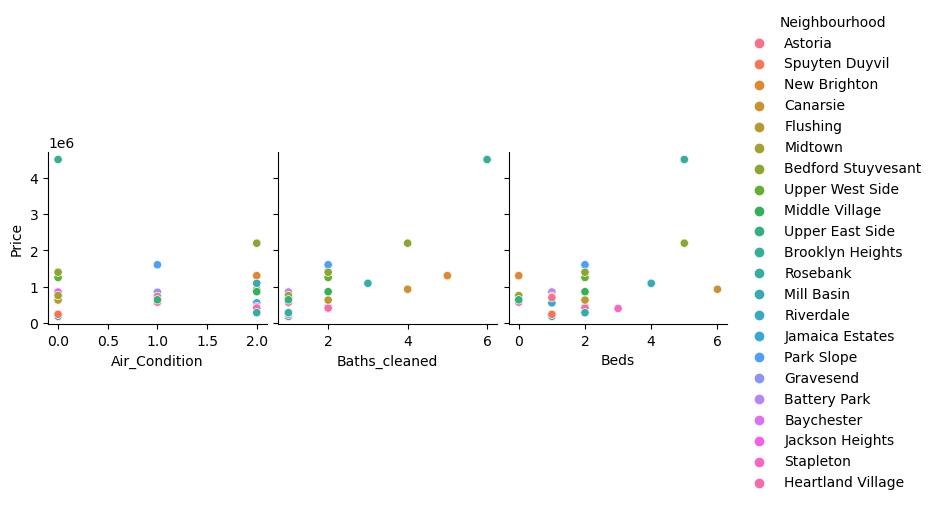

In [238]:
sns.pairplot(
    data, hue='Neighbourhood',
    x_vars=["Air_Condition", "Baths_cleaned", "Beds"],
    y_vars=["Price"])

In [239]:
#Pair plot - Graph out each specific amenity’s impact on property pricing in NY
